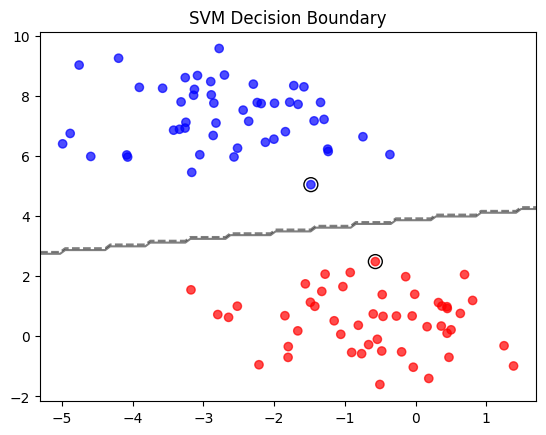

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=100, centers=2)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1
# Initialize parameters
learning_rate = 0.001
lambda_param = 0.01
n_iters = 1000
n_samples, n_features = X.shape
w = np.zeros(n_features)
b = 0

# Training the SVM using gradient descent
for _ in range(n_iters):
    for idx, x_i in enumerate(X):
        condition = y[idx] * (np.dot(x_i, w) - b) >= 1
        if condition:
            w -= learning_rate * (2 * lambda_param * w)
        else:
            w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, y[idx]))
            b -= learning_rate * y[idx]

# Predict function
def predict(X):
    linear_output = np.dot(X, w) - b
    return np.sign(linear_output)

# Make predictions
predictions = predict(X)

# Visualize results
def plot_svm(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    
    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = predict(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Plot support vectors
    support_vectors = (np.abs(y * (np.dot(X, w) - b)) < 1 + 1e-5)
    plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_svm(X, y)
